<a href="https://colab.research.google.com/github/tj-ie/data_analytics/blob/main/VBGMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [17]:
wine = datasets.load_wine()
X = wine.data[:, [9, 12]]
Y = wine.target

# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [18]:
# K-Meansのモデル作成
model2 = KMeans(n_clusters=2, random_state=103)
model3 = KMeans(n_clusters=3, random_state=103)
model4 = KMeans(n_clusters=4, random_state=103)

# モデルの訓練
model2.fit(X_std)
model3.fit(X_std)
model4.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=103, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K-means(n_clusters=4)')

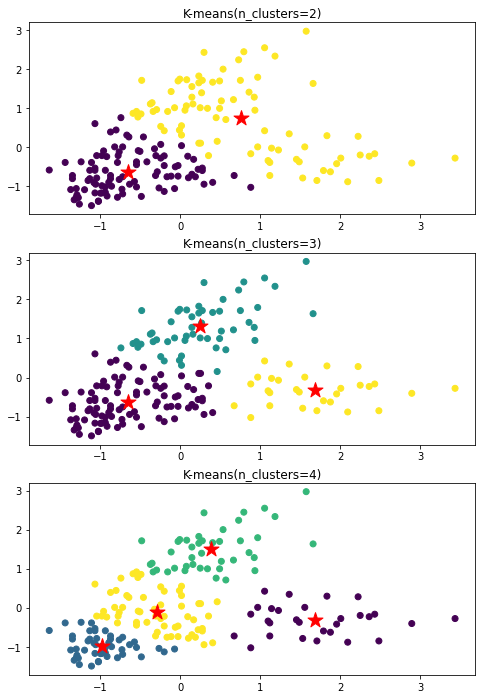

In [19]:
plt.figure(figsize=(8, 12))

# n=2
plt.subplot(3, 1, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.title('K-means(n_clusters=2)')

# n=3
plt.subplot(3, 1, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model3.labels_)
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.title('K-means(n_clusters=3)')

# n=4
plt.subplot(3, 1, 3)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model4.labels_)
plt.scatter(model4.cluster_centers_[:, 0], model4.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.title('K-means(n_clusters=4)')

In [20]:
from sklearn.mixture import BayesianGaussianMixture

In [21]:
v_model = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=6)

# モデルの訓練
v_model.fit(X_std)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=6, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

Text(0.5, 1.0, 'VBGMM(covariance_type=full')

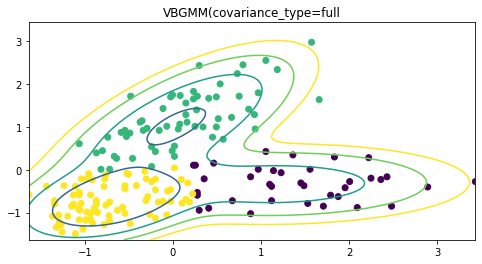

In [22]:
plt.figure(figsize=(8, 4))

# 変分混合ガウス分布プロット
x = np.linspace(X_std[:, 0].min(), X_std[:, 0].max(), 100)
y = np.linspace(X_std[:, 0].min(), X_std[:, 0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -v_model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2, 3, 4, 5]) # 等高線のプロット
plt.scatter(X_std[:, 0], X_std[:, 1], c=v_model.predict(X_std))
plt.title('VBGMM(covariance_type=full')

In [23]:
v_model.weights_ # 混合係数

array([2.30815577e-01, 5.95634153e-03, 3.67277092e-01, 3.95408193e-01,
       4.93451263e-04, 4.48590918e-05, 4.07809925e-06, 3.70736296e-07,
       3.37032996e-08, 3.06393633e-09])

Text(0.5, 1.0, 'Wine dataset')

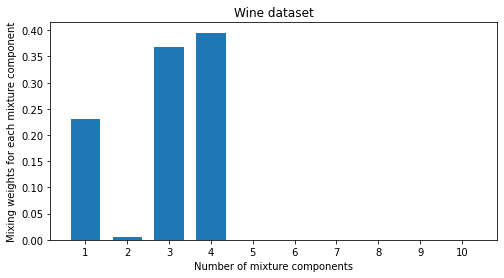

In [24]:
# 混合係数の可視化
x = np.arange(1, v_model.n_components+1)

plt.figure(figsize=(8, 4))
plt.bar(x, v_model.weights_, width=0.7, tick_label=x)

plt.ylabel('Mixing weights for each mixture component')
plt.xlabel('Number of mixture components')
plt.title('Wine dataset')